## Notebook 1 : Prise en main

Durant cette séance, nous avons pris en main les Dataframes, et essayé de faire un premier pas vers l'analyse des données GPS.

Tout d'abord, nous importons pandas pour la manipulation de données, et seaborn pour la visualisation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data/LOU MHR Export for Delon Armitage 43636.csv',skiprows=8,sep=";")#L

Ensuite, nous réglons le formalisme : nous remplaçons les virgules françaises par des points compréhensibles par Python, puis nous convertissons les 'strings' en 'float', afin de pouvoir les manipuler en tant que données numériques

In [2]:
data=data.replace(',','.',regex=True)
data[["Latitude","Longitude","Velocity","Odometer"]]=data[["Latitude","Longitude","Velocity","Odometer"]].apply(pd.to_numeric)

Pour s'essayer à la manipulation de données, nous créons une nouvelle colonne mesurant l'écart de distance parcourue entre deux points, puis nous la visualisons.

In [3]:
data["DistanceParc"]=[data["Odometer"][i+1]-data["Odometer"][i] for i in range(len(data)-1)]+[0]

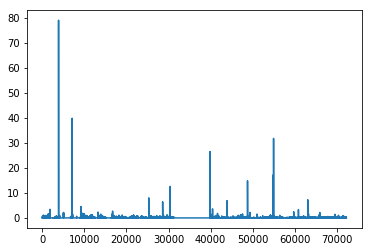

In [4]:
data["DistanceParc"].plot()

Ensuite nous visualisons les données GPS pures, afin de regarder les déplacements du joueur. On constate quelques points écartés sûrement incohérents (il faudrait le vérifier avec les données GPS du terrain), il faudra traiter ce problème ultérieurement. Nous essayons aussi le module seaborn pour tracer une heatmap.

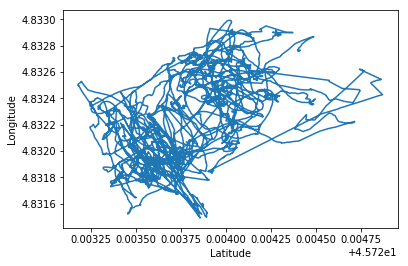

In [5]:
graph=data.plot(x="Latitude",y="Longitude", legend=False)
graph.set(xlabel="Latitude",ylabel="Longitude")
plt.show()

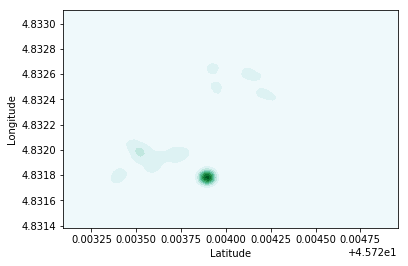

In [6]:
sns.kdeplot(data['Latitude'],data['Longitude'],shade=True)